In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report

# Load dataset
file_path = r"cleaned_anxiety_dataset.csv"
df = pd.read_csv(file_path)

# Drop 'id' column if it exists
if 'id' in df.columns:
    df.drop(columns=['id'], inplace=True)

# Compute GAD-7 score
gad_columns = ['gad1', 'gad2', 'gad3', 'gad4', 'gad5', 'gad6', 'gad7']
df['gad7_total'] = df[gad_columns].sum(axis=1)

# Create binary anxiety label
df['anxiety_label'] = (df['gad7_total'] >= 10).astype(int)

# Encode categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X = df[gad_columns]  # Only using GAD-7 questions
y = df['anxiety_label']
X = imputer.fit_transform(X)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

cross_val_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validated Accuracy Scores:", cross_val_scores)
print("Mean Cross-Validated Accuracy:", cross_val_scores.mean())

# Accuracy
y_pred = model.predict(X_test)

roc_auc = roc_auc_score(y_test, y_pred)
print("ROC-AUC Score:", roc_auc)
print("Classification Report:\n", classification_report(y_test, y_pred))

Cross-validated Accuracy Scores: [0.96774194 0.96774194 0.97580645 0.97580645 0.96774194]
Mean Cross-Validated Accuracy: 0.9709677419354839
ROC-AUC Score: 0.9304192685102587
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       118
           1       0.89      0.89      0.89        38

    accuracy                           0.95       156
   macro avg       0.93      0.93      0.93       156
weighted avg       0.95      0.95      0.95       156



Text(0.5, 0, 'gad7_total')

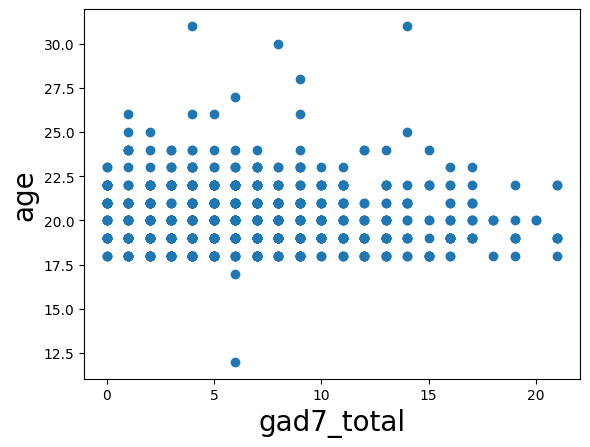

In [3]:
# scatterplot
plt.scatter(df['gad7_total'],df['age'])
plt.ylabel('age', size =20)
plt.xlabel("gad7_total", size =20)

Text(0, 0.5, 'gad7_total')

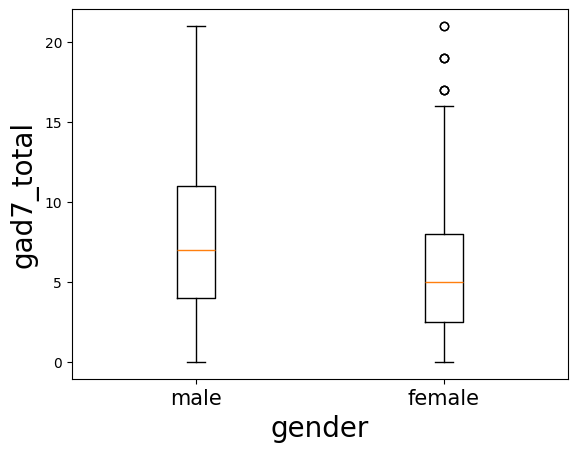

In [4]:
# box_plot
plt.boxplot(df[df.gender == 0]['gad7_total'],positions=[1])
plt.boxplot(df[df.gender == 1]['gad7_total'],positions=[2])

plt.xticks(ticks=[1,2], labels=["male","female"], size = 15)
plt.xlabel('gender', size =20)
plt.ylabel("gad7_total", size =20)

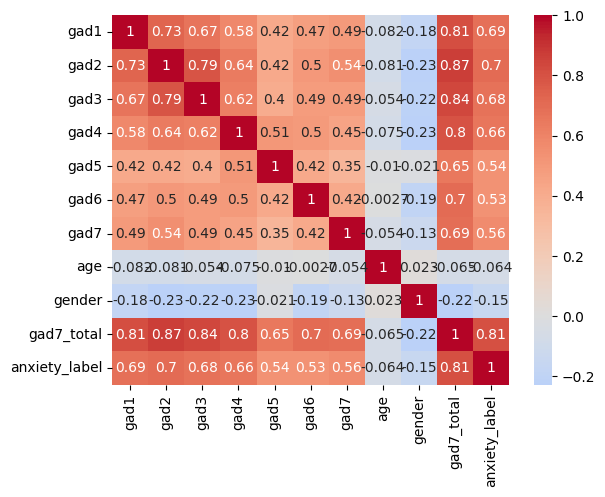

In [5]:
# Heat map 
cont = ['gad1', 'gad2', 'gad3', 'gad4', 'gad5', 'gad6', 'gad7', 'age', 'gender', 'gad7_total', 'anxiety_label']
corr_matrix = pd.DataFrame(df[cont],columns=cont).corr()
sns.heatmap(corr_matrix, annot=True, center=0, cmap='coolwarm')
plt.show()

In [6]:
import shap
shap.initjs()

explainer = shap.TreeExplainer(model)
shap_values = explainer(X)

C:\Users\kumud\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
np.shape(shap_values.values)

(776, 7, 2)

In [8]:
shap.plots.beeswarm(shap_values[:777, :, 0], show=False)

fig = plt.gcf()

fig.set_size_inches(10, 8)

fig.savefig("shap_beeswarm_plot.pdf", dpi=300, bbox_inches='tight')

plt.close(fig)

In [9]:
shap.plots.beeswarm(shap_values[:777,:,1], show=False)

fig = plt.gcf()

fig.set_size_inches(10, 8)

fig.savefig("shap_beeswarm1_plot.pdf", dpi=300, bbox_inches='tight')

plt.close(fig)

In [10]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Dummy example data - replace with your actual dataframe `df`
# # Example: df = pd.read_csv('cleaned_anxiety_dataset.csv')

# # Scatter plot: gad7_total vs age
# plt.figure(figsize=(8,6))
# plt.scatter(df['gad7_total'], df['age'], alpha=0.7)
# plt.xlabel('gad7_total', fontsize=14)
# plt.ylabel('Age', fontsize=14)
# plt.title('Scatter plot of gad7_total vs Age', fontsize=16)
# plt.grid(True)
# plt.tight_layout()
# plt.savefig('scatter_gad7_age.pdf')  # Save as PDF for vector quality
# plt.close()

# # Boxplot: gad7_total by gender
# plt.figure(figsize=(8,6))
# sns.boxplot(x='gender', y='gad7_total', data=df)
# plt.xlabel('Gender', fontsize=14)
# plt.ylabel('gad7_total', fontsize=14)
# plt.title('Boxplot of gad7_total by Gender', fontsize=16)
# plt.xticks([0,1], ['Male', 'Female'])
# plt.tight_layout()
# plt.savefig('boxplot_gad7_gender.pdf')
# plt.close()

# # Heatmap: correlation matrix of selected features
# features = ['gad1', 'gad2', 'gad3', 'gad4', 'gad5', 'gad6', 'gad7', 'age', 'gender', 'gad7_total', 'anxiety_label']
# corr_matrix = df[features].corr()

# plt.figure(figsize=(10,8))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', square=True)
# plt.title('Correlation Heatmap', fontsize=16)
# plt.tight_layout()
# plt.savefig('heatmap_corr.pdf')
# plt.close()


In [11]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler

# Load dataset
data_path = r'Dataset_14-day_AA_depression_symptoms_mood_and_PHQ-9.csv'
df = pd.read_csv(data_path)
df.columns = df.columns.str.strip()

# Compute PHQ-9 total
phq_columns = ['phq1','phq2','phq3','phq4','phq5','phq6','phq7','phq8','phq9']
df['phq_total'] = df[phq_columns].sum(axis=1)

# Binary target
df['has_mental_health_issues'] = (df['phq_total'] >= 10).astype(int)

# Encode sex
df['sex'] = df['sex'].map({'male':0, 'female':1})

# Features
feature_columns = phq_columns + ['age','sex']
X = df[feature_columns]
y = df['has_mental_health_issues']

# Preprocessing
numeric_features = phq_columns + ['age']
categorical_features = ['sex']

numeric_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

preprocessor = ColumnTransformer([
    ('num', numeric_imputer, numeric_features),
    ('cat', categorical_imputer, categorical_features)
])

X_imputed = preprocessor.fit_transform(X)
X_imputed[:,:len(numeric_features)] = X_imputed[:,:len(numeric_features)].astype(int)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=42)

# Undersample
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X_train,y_train)

# Train Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_resampled,y_resampled)

# Cross-validation
cv_scores = cross_val_score(model, X_resampled, y_resampled, cv=5, scoring='accuracy')
print("RF CV Accuracy Scores:", cv_scores)
print("RF Mean CV Accuracy:", cv_scores.mean())

# Evaluation
y_pred = model.predict(X_test)
print("RF ROC-AUC:", roc_auc_score(y_test,y_pred))
print("RF Report:\n", classification_report(y_test,y_pred))


RF CV Accuracy Scores: [1. 1. 1. 1. 1.]
RF Mean CV Accuracy: 1.0
RF ROC-AUC: 1.0
RF Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1106
           1       1.00      1.00      1.00      3739

    accuracy                           1.00      4845
   macro avg       1.00      1.00      1.00      4845
weighted avg       1.00      1.00      1.00      4845



In [12]:
explainer2 = shap.Explainer(model)
shap_values = explainer2(X)

In [13]:
np.shape(shap_values.values)

(16150, 11, 2)

In [14]:
shap.plots.beeswarm(shap_values[:16150,:,0], show=False)

fig = plt.gcf()

fig.set_size_inches(10, 8)

fig.savefig("shap_beeswarm0_plot.pdf", dpi=300, bbox_inches='tight')

plt.close(fig)